# Soluciones clásicas para placas

In [1]:
if 'google.colab' in str(get_ipython()):
    %pip install ipympl
    from google.colab import output
    output.enable_custom_widget_manager()

In [2]:
%matplotlib widget

In [3]:
import numpy as np
from sympy import *

In [4]:
init_session()

IPython console for SymPy 1.9 (Python 3.9.7-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



## Flexión pura

Consideremos una placa rectangular con fronteras y libres y
momentos constantes aplicados sobres sus aristas. De tal forma que
$M_{xx} = m_1$, $M_{yy} = m_2$.

Si tomamos una solución de la forma 

$$ w(x, y) = C_1 x^2 + C_2 y^2\, ,$$

tendríamos momentos flectores constantes

$$M_{xx} = -D\left[\frac{\partial^2 w}{\partial x^2} + \nu\frac{\partial^2 w}{\partial x^2} \right]
= -2D(C_1 + \nu C_2)\, ,$$

y

$$M_{yy} = -D\left[\nu\frac{\partial^2 w}{\partial x^2} + \frac{\partial^2 w}{\partial x^2} \right]
= -2D(\nu C_1 +  C_2)\, .$$

El momento torsor $M_{xy}=0$ en este caso.

Vamos a verlo en SymPy

In [5]:
C1, C2, D, nu = symbols("C1 C2 D nu")
m1, m2 = symbols("m1 m2")

In [6]:
w = C1*x**2 + C2*y**2
w

Calculemos los momentos

In [7]:
Mxx = -D*(w.diff(x, 2) + nu*w.diff(y, 2))
Mxx

In [8]:
Myy = -D*(nu*w.diff(x, 2) + w.diff(y, 2))
Myy

In [9]:
Mxy = -D*w.diff(x, y)
Mxy

Para determinar las constantes de integración igualamos
los momentos a los momentos externos aplicados en las
aristas de la placa y resolvemos el sistema de ecuaciones
para $C_1$ y $C_2$.

In [10]:
eqs = [Mxx - m1, Myy - m2]
eqs

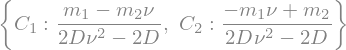

In [11]:
constantes = solve(eqs, [C1, C2])
constantes

Podemos obtener la solución al remplazar estos valores en
la expresión para la deflexión.

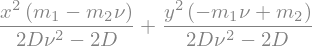

In [12]:
w_sol = w.subs(constantes)
w_sol

### Visualización

<div class="alert alert-info">

Cambie los valores de $m_1$ y $m_2$ a continuación
para ver las diferencias en la deflexión.
    
</div>

Text(0.5, 0, '$w(x, y)$')

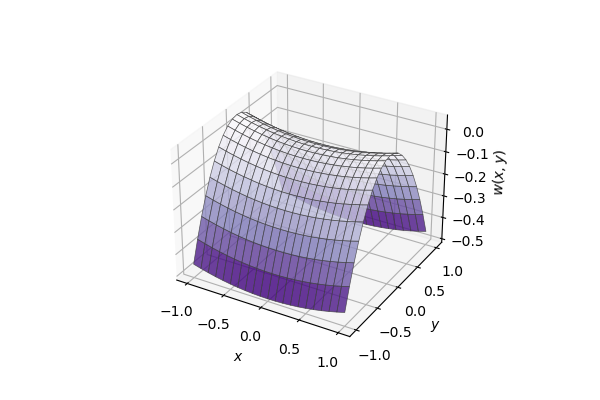

In [21]:
D = 1
nu = 0.1
m1 = 0
m2 = 1
Y, X = np.mgrid[-1:1:21j, -1:1:21j]
C1 = -(m1 - nu*m2)/(2*D*(1 - nu**2))
C2 = -(m2 - nu*m1)/(2*D*(1 - nu**2))
W = C1*X**2 + C2*Y**2

fig0 = plt.figure(figsize=(6, 4))
ax0 = fig0.add_subplot(111, projection='3d')
ax0.plot_surface(X, Y, W, cmap="Purples_r", cstride=1, rstride=1, alpha=0.8,
               lw=0.5, edgecolor="#3c3c3c")
ax0.set_xlabel("$x$")
ax0.set_ylabel("$y$")
ax0.set_zlabel("$w(x, y)$")

## Momentos torsores como condiciones de frontera

Ahora consideremos la siguiente función para la deflexión

$$w(x, y) = C xy\, .$$

Esta corresponde a una placa con momentos torsores aplicados
($m$) en sus aristas y

$$C = -\frac{m}{D(1 - \nu)}\, ,$$

En este caso, los momentos flectores son

$$M_{xx} = M_{yy} = 0\, .$$

<div class="alert alert-info">

Deduzca el valor de $C$ a partir de la aplicación de
condiciones de frontera para la solucón.
</div>

Text(0.5, 0, '$w(x, y)$')

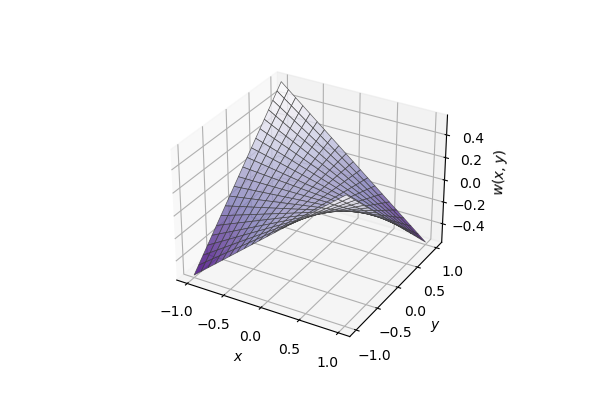

In [22]:
D = 1
nu = 0.3
m = 1
Y, X = np.mgrid[-1:1:21j, -1:1:21j]
C = -m/(2*D*(1 - nu**2))
W = C * X * Y

fig1 = plt.figure(figsize=(6, 4))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.plot_surface(X, Y, W, cmap="Purples_r", cstride=1, rstride=1, alpha=0.8,
               lw=0.5, edgecolor="#3c3c3c")
ax1.set_xlabel("$x$")
ax1.set_ylabel("$y$")
ax1.set_zlabel("$w(x, y)$")

Como se discutió en clase, en este problema tenemos fuerzas en las esquinas
de la placa $F = \pm 2 M_{xy}$.

In [29]:
a, b = symbols("a b")
fun = x * y * (x - a) * (y - b)
fun

In [30]:
simplify(fun.diff(x,4) + 2*fun.diff(x, 2, y, 2) + fun.diff(y, 4))